#                                     Telco's Customer Churn Analysis

In [221]:
# Importing the relevant modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats as stats
%matplotlib inline

#load the raw dataset
telco_customer_churn = pd.read_csv("Telco_Customer_Churn.csv")
telco_customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [128]:
# A sample of the top 5 rows and in the dataset
telco_customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
# checking for empty cells

telco_customer_churn.isnull().values.any()

True

In [130]:
# Checking for duplicate cells

telco_customer_churn.duplicated().values.any()

False

In [131]:
# Deleting empty cells

telcos = telco_customer_churn.dropna()
telcos.isna().values.any()

False

In [132]:
# Deleting irrelevant columns

telcos_new = telcos.drop(['SeniorCitizen','Partner','Dependents','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'], axis = 1)
telcos_new

,customerID,gender,tenure,PhoneService,MultipleLines,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,No,No phone service,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,34,Yes,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,2,Yes,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,45,No,No phone service,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,Yes,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,24,Yes,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,72,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,11,No,No phone service,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,4,Yes,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [133]:
# Hot Encoding

telcos_e = pd.get_dummies(telcos_new, columns = ['gender', 'PhoneService', 'MultipleLines', 'PaymentMethod', 'Churn'])
telcos_e.sum()

customerID                                 7590-VHVEG5575-GNVDE3668-QPYBK7795-CFOCW9237-H...
tenure                                                                                227990
Contract                                   Month-to-monthOne yearMonth-to-monthOne yearMo...
MonthlyCharges                                                                      455661.0
TotalCharges                                                                      16056168.7
gender_Female                                                                           3483
gender_Male                                                                             3549
PhoneService_No                                                                          680
PhoneService_Yes                                                                        6352
MultipleLines_No                                                                        3385
MultipleLines_No phone service                                        

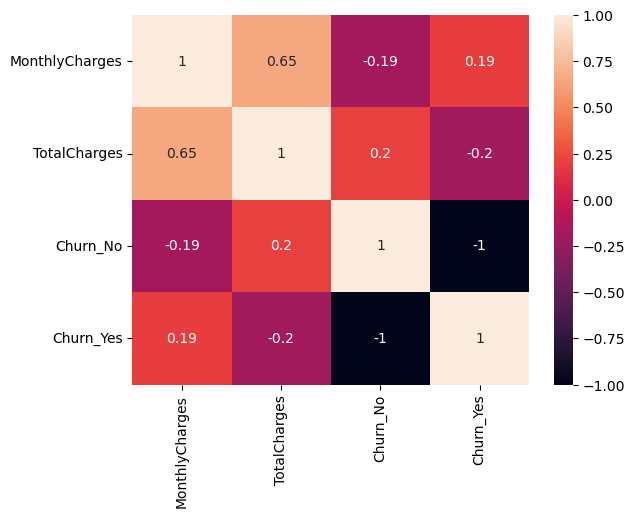

In [134]:
# Correlation of Key Dataset Variables

bbs= sns.heatmap(telcos_e[['MonthlyCharges','TotalCharges', 'Churn_No', 'Churn_Yes']].corr(),annot=True)

In [135]:
#Conduct hypothesis tests (e.g., t-tests) to compare differences between churned and non-churned customers

ttest = stats.ttest_ind(telcos_e['Churn_No'], telcos_e['Churn_Yes'])
ttest


Ttest_indResult(statistic=62.872601802706434, pvalue=0.0)

In [136]:
#Summary Tables of Specific Variables
#Summary Table of Contract variable
telcos_e.groupby('Contract').describe()

tenure                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Contract                                                                    
Month-to-month  3875.0  18.036645  17.689054  1.0   3.0  12.0  29.0  72.0   
One year        1472.0  42.073370  19.010750  1.0  27.0  44.0  58.0  72.0   
Two year        1685.0  57.071810  17.729130  1.0  48.0  64.0  71.0  72.0   

               MonthlyCharges             ... Churn_No      Churn_Yes  \
                        count       mean  ...      75%  max     count   
Contract                                  ...                           
Month-to-month         3875.0  66.398490  ...      1.0  1.0    3875.0   
One year               1472.0  65.079416  ...      1.0  1.0    1472.0   
Two year               1685.0  60.872374  ...      1.0  1.0    1685.0   

                                                             
                    mean       std  min  25%  50%  75%  max  
Contract                                                     
Month-to-month  0.427097  0.494720  0.0  0.0  0.0  1.0  1.0  
One year        0.112772  0.316421  0.0  0.0  0.0  0.0  1.0  
Two year        0.028487  0.166408  0.0  0.0  0.0  0.0  1.0  

[3 rows x 128 columns]

In [137]:
# Summary Table of the Bank Transfer Payment Method
telcos_e.groupby('PaymentMethod_Bank transfer (automatic)').describe()

tenure                             \
                                          count       mean        std  min   
PaymentMethod_Bank transfer (automatic)                                      
0                                        5490.0  29.250273  23.984578  1.0   
1                                        1542.0  43.713359  23.159539  1.0   

                                                                 \
                                          25%   50%   75%   max   
PaymentMethod_Bank transfer (automatic)                           
0                                         7.0  24.0  51.0  72.0   
1                                        23.0  48.0  66.0  72.0   

                                        MonthlyCharges             ...  \
                                                 count       mean  ...   
PaymentMethod_Bank transfer (automatic)                            ...   
0                                               5490.0  64.122040  ...   
1                                               1542.0  67.205577  ...   

                                        Churn_No      Churn_Yes            \
                                             75%  max     count      mean   
PaymentMethod_Bank transfer (automatic)                                     
0                                            1.0  1.0    5490.0  0.293443   
1                                            1.0  1.0    1542.0  0.167315   

                                                                            
                                              std  min  25%  50%  75%  max  
PaymentMethod_Bank transfer (automatic)                                     
0                                        0.455381  0.0  0.0  0.0  1.0  1.0  
1                                        0.373378  0.0  0.0  0.0  0.0  1.0  

[2 rows x 120 columns]

In [138]:
# Summary Table of the Credit Card Payment Method
telcos_e.groupby('PaymentMethod_Credit card (automatic)').describe()

tenure                             \
                                        count       mean        std  min   
PaymentMethod_Credit card (automatic)                                      
0                                      5511.0  29.420069  24.022534  1.0   
1                                      1521.0  43.297830  23.320847  1.0   

                                                              MonthlyCharges  \
                                        25%   50%   75%   max          count   
PaymentMethod_Credit card (automatic)                                          
0                                       7.0  24.0  51.0  72.0         5511.0   
1                                      23.0  47.0  66.0  72.0         1521.0   

                                                  ... Churn_No      Churn_Yes  \
                                            mean  ...      75%  max     count   
PaymentMethod_Credit card (automatic)             ...                           
0                                      64.323208  ...      1.0  1.0    5511.0   
1                                      66.519264  ...      1.0  1.0    1521.0   

                                                                               \
                                           mean       std  min  25%  50%  75%   
PaymentMethod_Credit card (automatic)                                           
0                                      0.297042  0.456997  0.0  0.0  0.0  1.0   
1                                      0.152531  0.359653  0.0  0.0  0.0  0.0   

                                            
                                       max  
PaymentMethod_Credit card (automatic)       
0                                      1.0  
1                                      1.0  

[2 rows x 120 columns]

In [139]:
# Summary Table of the Electronic check Payment Method

telcos_e.groupby('PaymentMethod_Electronic check').describe()

tenure                                         \
                                 count       mean        std  min   25%   50%   
PaymentMethod_Electronic check                                                  
0                               4667.0  36.094279  24.777278  1.0  12.0  35.0   
1                               2365.0  25.174630  22.382301  1.0   5.0  18.0   

                                           MonthlyCharges             ...  \
                                 75%   max          count       mean  ...   
PaymentMethod_Electronic check                                        ...   
0                               60.5  72.0         4667.0  58.992072  ...   
1                               43.0  72.0         2365.0  76.255814  ...   

                               Churn_No      Churn_Yes                      \
                                    75%  max     count      mean       std   
PaymentMethod_Electronic check                                               
0                                   1.0  1.0    4667.0  0.170988  0.376539   
1                                   1.0  1.0    2365.0  0.452854  0.497878   

                                                         
                                min  25%  50%  75%  max  
PaymentMethod_Electronic check                           
0                               0.0  0.0  0.0  0.0  1.0  
1                               0.0  0.0  0.0  1.0  1.0  

[2 rows x 120 columns]

In [220]:
# Summary Table of the Mailed check Payment Method

telcos_e.groupby('PaymentMethod_Mailed check').describe()

tenure                                         \
                             count       mean        std  min   25%   50%   
PaymentMethod_Mailed check                                                  
0                           5428.0  35.519528  24.607256  1.0  12.0  35.0   
1                           1604.0  21.938903  21.214997  1.0   3.0  15.0   

                                       MonthlyCharges             ...  \
                             75%   max          count       mean  ...   
PaymentMethod_Mailed check                                        ...   
0                           59.0  72.0         5428.0  70.956485  ...   
1                           36.0  72.0         1604.0  43.958354  ...   

                           Churn_No      Churn_Yes                           \
                                75%  max     count      mean       std  min   
PaymentMethod_Mailed check                                                    
0                               1.0  1.0    5428.0  0.287583  0.452677  0.0   
1                               1.0  1.0    1604.0  0.192020  0.394012  0.0   

                                                
                            25%  50%  75%  max  
PaymentMethod_Mailed check                      
0                           0.0  0.0  1.0  1.0  
1                           0.0  0.0  0.0  1.0  

[2 rows x 120 columns]

In [183]:
# Summary Table of the Churn variable

telcos_e.groupby('Churn_Yes').describe()

tenure                                                     \
            count       mean        std  min   25%   50%   75%   max   
Churn_Yes                                                              
0          5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
1          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

          MonthlyCharges             ... PaymentMethod_Mailed check       \
                   count       mean  ...                        75%  max   
Churn_Yes                            ...                                   
0                 5163.0  61.307408  ...                        1.0  1.0   
1                 1869.0  74.441332  ...                        0.0  1.0   

          Churn_No                                     
             count mean  std  min  25%  50%  75%  max  
Churn_Yes                                              
0           5163.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1           1869.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 120 columns]

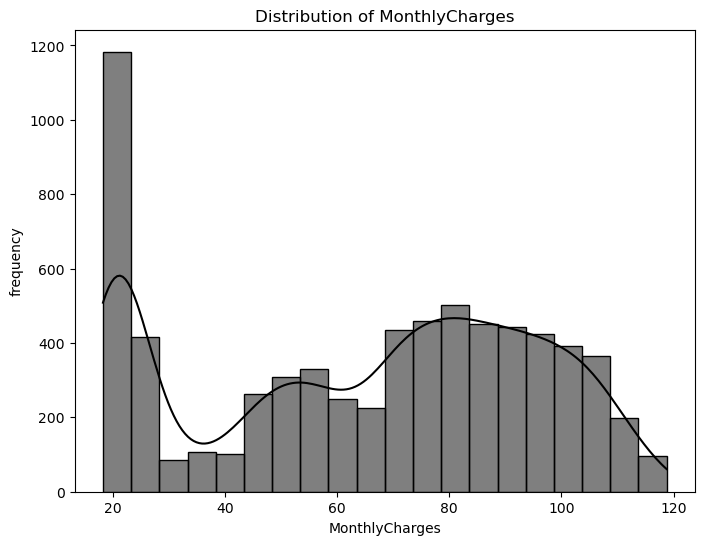

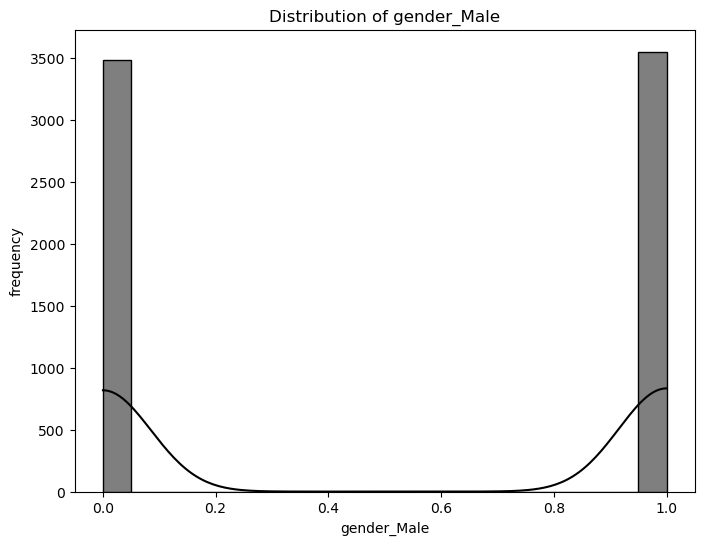

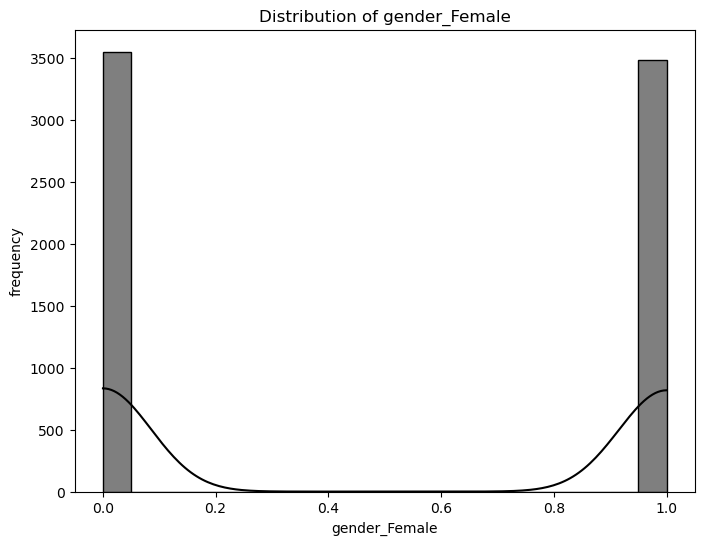

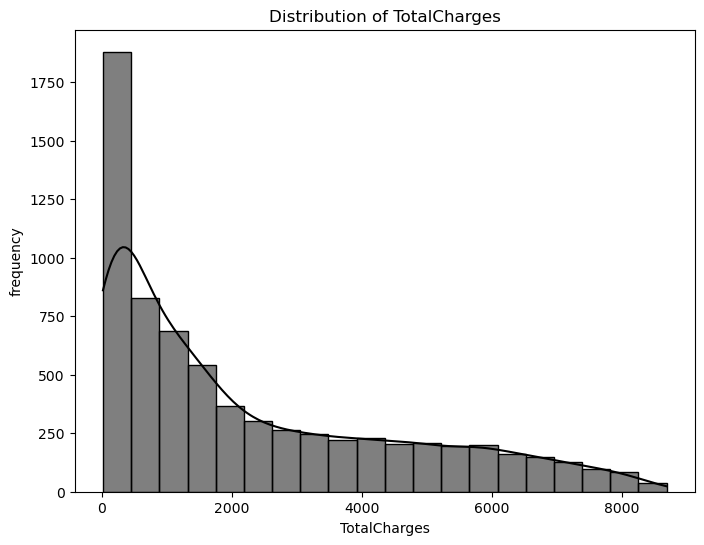

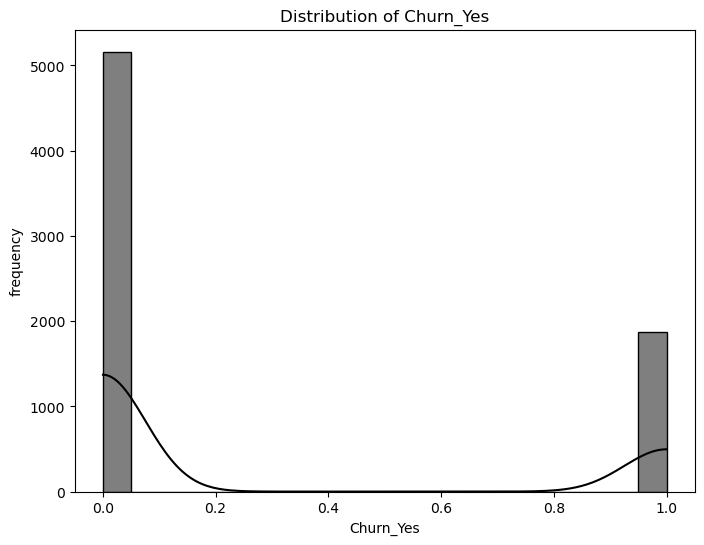

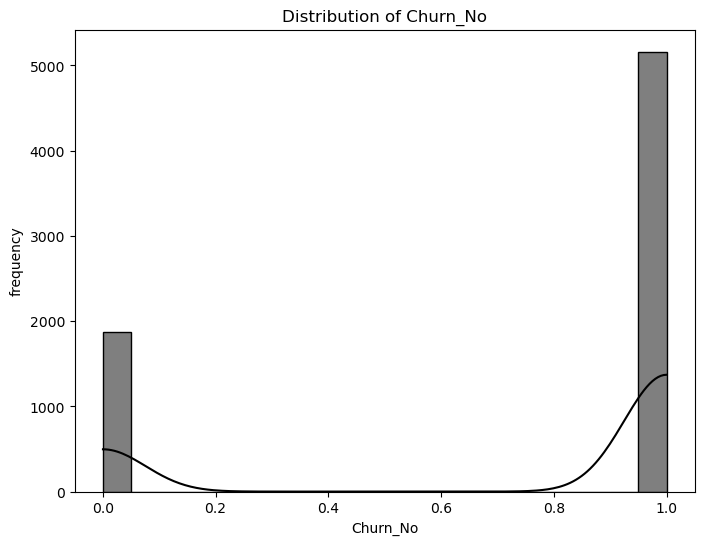

In [190]:
# Visualizing The Relationships Between Key Variables

key_variables = ['MonthlyCharges','gender_Male','gender_Female','TotalCharges','Churn_Yes','Churn_No']
for variable in key_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(telcos_e[variable], bins=20, kde=True, color='black')
    plt.xlabel(variable)
    plt.ylabel('frequency')
    plt.title(f'Distribution of {variable}')
    plt.show()

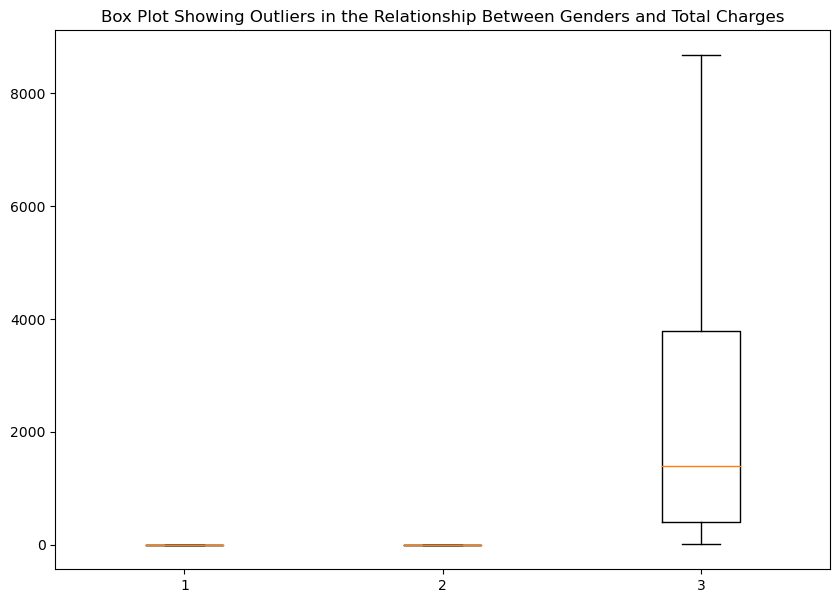

In [124]:
# Box Plot showing Outliers

fig = plt.figure(figsize=(10,7))
plt.boxplot([telcos_e['gender_Male'], telcos_e['gender_Female'], telcos_e['TotalCharges']])
plt.title('Box Plot Showing Outliers in the Relationship Between Genders and Total Charges')
plt.show()

Text(0.5, 1.0, 'Relationship Bewtween Monthly and Total Charges')

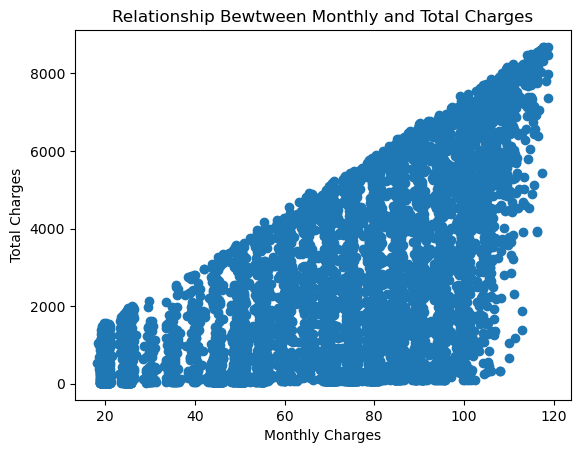

In [113]:
# Scatter Plot: Monthly and Total Charges
plt.scatter(x = telcos_e['MonthlyCharges'], y=telcos_e['TotalCharges'])
plt.xlabel('Monthly Charges'), plt.ylabel('Total Charges')
plt.title('Relationship Bewtween Monthly and Total Charges')

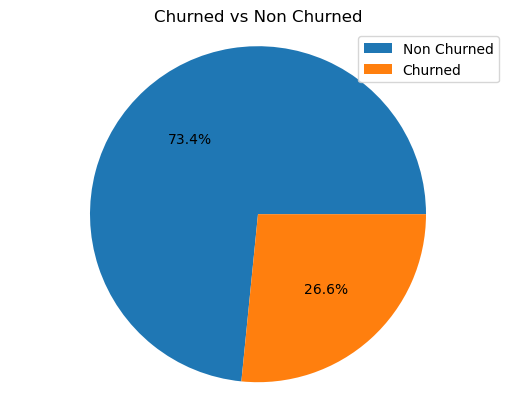

In [121]:
#Pie Chart (Proportion of Churned and Non Churned Customers)

pie_c = plt.pie([telcos_e['Churn_No'].sum(), telcos_e['Churn_Yes'].sum()], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Churned vs Non Churned")
plt.legend(labels=['Non Churned', 'Churned'])

In [ ]:
# Careful observation of the data explored above shows that customers who pay less Total charges 
# are more likely to keep patronizing the company than the ones who pay higher Total charges